<a href="https://colab.research.google.com/github/GenghisKhandybar/Movie-Data-Analysis/blob/main/DATA_301_Final_Project_Charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json
import pandas as pd
from pandas import json_normalize

In [ ]:
df_movies = pd.read_csv("df_movies.csv")
df_director_stats = pd.read_csv("df_directors.csv")
df_full_series = pd.read_csv("df_full_series.csv")

df_movies["id"] = df_movies["id"].astype(int)
df_movies["revenue"] = df_movies["revenue"].astype(int) #Potentially redundant type setting
df_movies["budget"] = df_movies["budget"].astype(int)
df_movies["release_date"] = pd.to_datetime(df_movies["release_date"])

In [ ]:
from altair import *

In [ ]:
chart = Chart(df_full_series).mark_boxplot().encode(
    x=X("collection_order", scale=Scale(domain=(0,6), clamp=True), axis=Axis(title="Series Position")), 
    y=Y("ROI", scale=Scale(domain=(0,50), clamp=True)),
    color="Standalone"
).properties(title="Return on Investment based on Series position")
chart


alt.Chart(...)

In [ ]:
#Outliers excluded for high ROI's
df_full_series[df_full_series["budget"]>1000][df_full_series["ROI"]>50].sort_values(
    "ROI", ascending=False
    )[["revenue", "budget", "ROI", "title_y"]]

revenue      budget         ROI                     title_y
558     7000000.0     10000.0  700.000000                  Eraserhead
401     6000000.0     12000.0  500.000000              Pink Flamingos
39     54667954.0    130000.0  420.522723                  Open Water
473   140000000.0    777000.0  180.180180           American Graffiti
783    22000000.0    160000.0  137.500000   The Legend of Boggy Creek
611   117235147.0   1000000.0  117.235147                       Rocky
951     3151130.0     27000.0  116.708519                      Clerks
349    11000000.0    100000.0  110.000000       The Birth of a Nation
1198   59754601.0    550000.0  108.644729             Friday the 13th
99    103911669.0   1200000.0   86.593058                         Saw
477    12854953.0    150000.0   85.699687        In the Mood for Love
525    55000000.0    650000.0   84.615385            Dawn of the Dead
428    29400000.0    350000.0   84.000000               The Evil Dead
338   792965500.0  10500000.0   75.520524  E.T. the Extra-Terrestrial
223    14500000.0    200000.0   72.500000        A Fistful of Dollars
2     775398007.0  11000000.0   70.490728                   Star Wars
319   470653000.0   7000000.0   67.236143                        Jaws
370    59600000.0    950000.0   62.736842                      Dr. No
263     3221152.0     60000.0   53.685867                          Pi
900    51525171.0   1000000.0   51.525171          The Breakfast Club

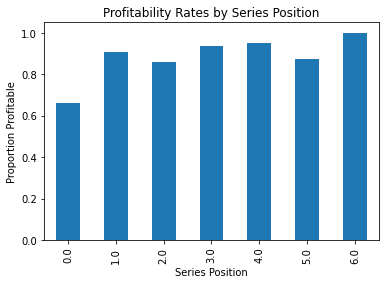

In [ ]:
pd.crosstab(df_full_series["collection_order"], df_full_series["made_even"], normalize="index")["Profitable"][0:6].plot.bar(
    x="collection_order",
    title="Profitability Rates by Series Position",
    xlabel="Series Position",
    ylabel="Proportion Profitable"
    )

In [ ]:
chart = Chart(df_movies).mark_circle().encode(
    x=X("release_date", axis=Axis(title="Release Date")), 
    y="revenue", 
    column="language"
).properties(title="English vs. Other Languages in Revenue")
chart

alt.Chart(...)

In [ ]:
import plotly.express as px
fig = px.scatter(df_director_stats, x="budget", y="revenue", size=df_director_stats["movies"],
                 title="Directors: Average budgets and revenue",
                 hover_data=["director", "averageRating"],
                 labels={
                     "budget": "Average Budget ($)",
                     "revenue": "Average Revenue ($)"
                 })
fig

In [ ]:
import pandas as pd
from altair import *
df_ngram = pd.read_csv("ngram.csv")

In [ ]:
df_ngram_graph = df_ngram.copy()
def prop_map(response):
  return float(str(response)[1:4]) * 100.0
df_ngram_graph["Percentage Correct"] = df_ngram_graph["Proportion Correct"].map(prop_map)

In [ ]:
bars = Chart(df_ngram_graph).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(Y("Percentage Correct"),
         x="Ngram Range", 
         color=condition(datum["Percentage Correct"] == df_ngram_graph["Percentage Correct"].max(),
                         value('orange'),
                         value("steelblue"))).properties(title="Optimizing N-gram Range")
text = text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=-7,
    dy=-5
).encode(
    text='Percentage Correct')
(bars + text)

alt.LayerChart(...)

In [ ]:
df_count = pd.read_csv("count.csv")
df_count_graph = df_count.copy()
df_count_graph["Percentage Correct"] = df_count_graph["Proportion Correct"].map(prop_map)

In [ ]:
df_count_graph["Group"] = (df_count_graph["Frequency Method"] + " " + 
                           df_count_graph["Ngram Range"].astype(str) + " " + 
                           df_count["Number Neighbors"].astype(str))

In [ ]:
bars = Chart(df_count_graph).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(Y("Percentage Correct"),
         x="Group", 
         color=condition(datum["Frequency Method"] == "tfidf",
                         value('orange'),
                         value("steelblue"))).properties(title="Optimizing Vectorization Method"
                                  )
text = text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=-7,
    dy=-5
).encode(
    text='Percentage Correct')
(bars + text)

alt.LayerChart(...)

In [ ]:
df_neighbors = pd.read_csv("neighbors.csv")

In [ ]:
df_neighbors_graph = df_neighbors.copy()
df_neighbors_graph["Percentage Correct"] = df_neighbors_graph["Proportion Correct"].map(prop_map)

In [ ]:
df_neighbors_graph["Number Neighbors"] = df_neighbors_graph["Number Neighbors"].astype(str)
df_neighbors_graph = df_neighbors_graph.sort_values(by="Number Neighbors")

In [ ]:
bars = Chart(df_neighbors_graph).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(Y("Percentage Correct"),
         x="Number Neighbors", 
         color=condition(datum["Percentage Correct"] == df_neighbors_graph["Percentage Correct"].max(),
                         value('orange'),
                         value("steelblue"))
                                  ).properties(title="Optimizing Number of Neighbors")
text = text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=-7,
    dy=-5
).encode(
    text='Percentage Correct')
(bars + text)

alt.LayerChart(...)

In [ ]:
df_overall = pd.read_csv("overall.csv")

In [ ]:
df_overall_graph = df_overall.copy()
df_overall_graph["Percentage Correct"] = df_overall_graph["Proportion Correct"].map(prop_map)

In [ ]:
df_overall_graph["Group"] = (df_overall_graph["Frequency Method"] + " " + 
                           df_overall_graph["Ngram Range"].astype(str) + " " + 
                           df_overall_graph["Number Neighbors"].astype(str))

In [ ]:
bars = Chart(df_overall_graph).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(Y("Percentage Correct"),
         x="Group", 
         color=condition(datum["Percentage Correct"] == df_overall_graph["Percentage Correct"].max(),
                         value('orange'),
                         value("steelblue"))
                                  ).properties(title="Overall Optimal Model")
text = text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=-7,
    dy=-5
).encode(
    text='Percentage Correct')
(bars + text)

alt.LayerChart(...)